# Spotify Music Skips Action Prediction

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from xgboost import XGBClassifier

In [4]:
path_track_features = "C:/Users/HP/Desktop/Spotify/spotify_data/data/track_feats.csv"
path_training_set = "C:/Users/HP/Desktop/Spotify/spotify_data/data/train_data.csv"

In [5]:
track_features = pd.read_csv(path_track_features)
training_set = pd.read_csv(path_training_set)

## Clean Up the track_features Data...

In [8]:
track_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [9]:
track_features.tail()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
316697,t_d83f9f08-c97c-4016-9a50-b954b690067c,-0.338709,1.0,0.665809,0.015659,0.583170,0.565491,0.739756,0.010257,0.734084,...,0.571429,0.489606,-0.282396,0.836088,0.879664,-0.570508,-1.374668,1.060288,0.902784,1.188963
316698,t_18374f42-775a-4b30-8290-5fdbae4abf66,0.595034,1.0,-2.083274,0.009085,0.557751,0.611746,0.675760,0.496123,0.486148,...,0.571429,0.128541,-1.326573,0.522085,0.511331,0.249874,-0.700613,-0.101871,-0.998303,0.503463
316699,t_3744e6a6-fa2f-4d3f-a29f-0c43b17762d7,-0.390532,1.0,0.677950,0.153849,0.518964,0.577224,0.698178,0.354531,0.587263,...,0.571429,0.214664,-1.166396,0.483569,0.374550,0.087464,-0.620181,-0.087409,-1.220365,0.369372
316700,t_c1fbc23f-e577-4ea6-95e6-0f2f99013934,-0.513326,1.0,0.689408,0.081950,0.620092,0.654756,0.819703,0.622234,0.629792,...,0.571429,0.953289,-0.608497,1.024093,1.122209,-0.110121,-0.934610,0.642496,0.162871,-0.151821
316701,t_2032661c-7b8a-4ac7-aba8-147778f073b6,-0.278552,1.0,0.672359,0.171612,0.466277,0.479513,0.666329,-0.199651,0.938241,...,0.571429,0.614840,-0.545387,1.277890,0.608589,-0.605832,-0.771592,0.728147,-0.025310,0.326801


In [10]:
track_features.shape

(316702, 30)

In [12]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                316702 non-null  object 
 1   duration                316702 non-null  float64
 2   release_year            316702 non-null  float64
 3   us_popularity_estimate  316702 non-null  float64
 4   acousticness            316702 non-null  float64
 5   beat_strength           316702 non-null  float64
 6   bounciness              316702 non-null  float64
 7   danceability            316702 non-null  float64
 8   dyn_range_mean          316702 non-null  float64
 9   energy                  316702 non-null  float64
 10  flatness                316702 non-null  float64
 11  instrumentalness        316702 non-null  float64
 12  key                     316702 non-null  float64
 13  liveness                316702 non-null  float64
 14  loudness            

In [13]:
track_features.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
is_major                  0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

**Does not contain any null values.**

## release_year

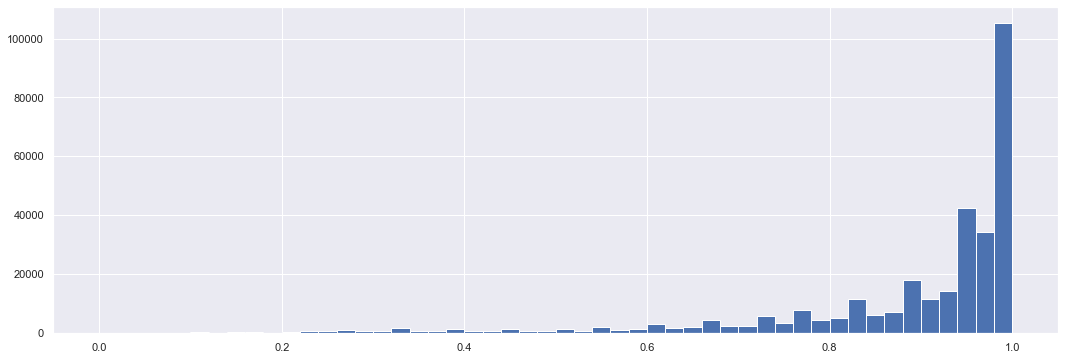

In [7]:
plt.figure(figsize=(18,6))
track_features['release_year'].hist(bins=50)
plt.show()

In [8]:
track_features['release_year'].value_counts().head(20)

1.000000    53563
0.985294    51813
0.970588    34219
0.955882    24302
0.941176    18293
0.926471    14320
0.911765    11680
0.897059     9695
0.882353     8313
0.867647     7064
0.852941     6352
0.838235     5849
0.823529     5626
0.808824     5208
0.794118     4416
0.779412     4281
0.764706     3663
0.750000     3472
0.735294     2971
0.720588     2895
Name: release_year, dtype: int64

In [9]:
track_features.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,...,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000
mean,0.000923,0.883444,-0.022242,0.281541,0.477372,0.497480,0.589497,-0.001272,0.632731,0.993752,...,0.556604,0.488560,0.005364,-0.006707,-0.004315,0.003672,0.002717,-0.003631,0.005902,0.000838
std,1.005991,0.165386,1.014102,0.301165,0.162313,0.188032,0.173186,1.001798,0.228166,0.048357,...,0.063584,0.256182,1.000247,1.002609,1.003723,1.001550,1.001636,1.003240,1.002118,1.002930
min,-2.359677,0.000000,-6.207444,0.000000,0.000000,0.000000,0.000000,-3.247292,0.000000,0.000000,...,0.000000,0.000000,-2.086612,-4.441997,-3.843906,-2.349572,-2.654358,-6.287599,-1.701727,-2.881315
25%,-0.524978,0.852941,-0.169543,0.024083,0.355427,0.349182,0.475606,-0.773883,0.484491,0.971236,...,0.571429,0.281569,-0.834468,-0.497206,-0.627210,-0.762369,-0.799895,-0.538955,-0.728965,-0.619601
50%,-0.105378,0.955882,0.358592,0.156679,0.476761,0.502692,0.603000,-0.095655,0.660723,1.001626,...,0.571429,0.480178,0.083995,0.224900,0.275068,0.070669,-0.238287,0.149411,-0.281970,0.141966
75%,0.375977,0.985294,0.584683,0.485536,0.594337,0.643910,0.720020,0.644239,0.815253,1.025645,...,0.571429,0.691242,0.831649,0.656089,0.715054,0.544088,0.837206,0.727947,0.521096,0.568692
max,19.108514,1.000000,0.715584,0.995796,0.987369,0.975535,0.995690,8.727326,0.999984,1.131413,...,0.714286,0.999990,2.857353,2.315441,2.176667,3.340167,2.442389,2.147237,3.135206,3.441050


In [10]:
track_features.describe(include=['O'])

,track_id
count,316702
unique,316702
top,t_6cf6f7d5-1d5d-4cb0-a7d9-572fb132473e
freq,1


## duration

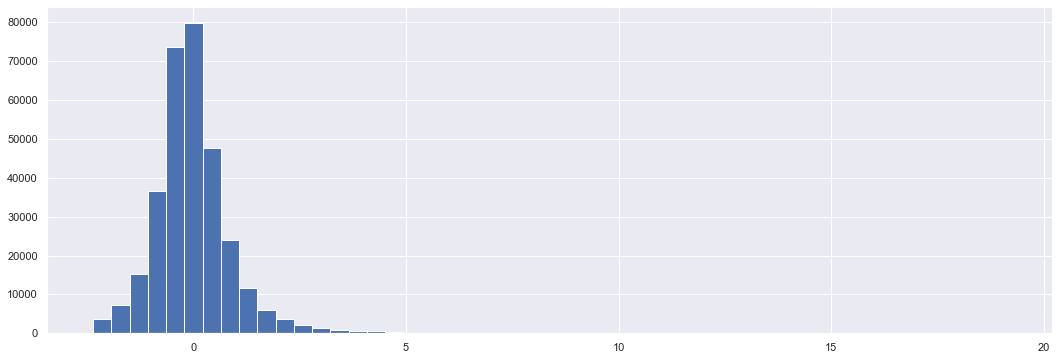

In [11]:
plt.figure(figsize=(18,6))
track_features['duration'].hist(bins=50)
plt.show()

**Now that we've cleaned up the track features, we can do the same for the other dataset.**

## us_popularity_estimate

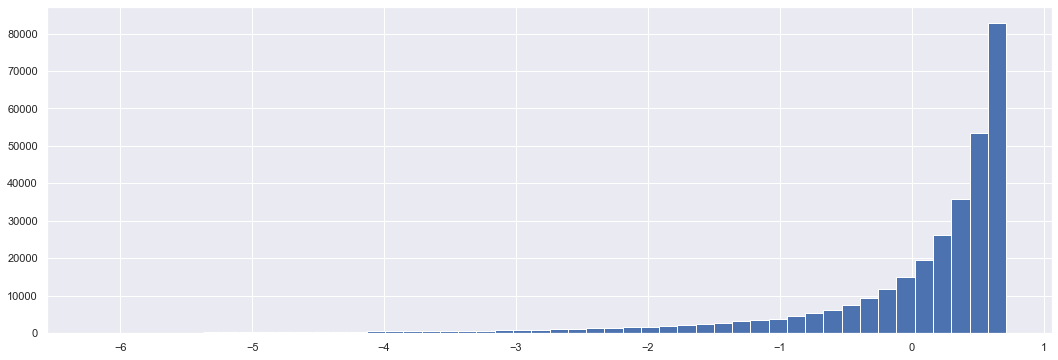

In [12]:
plt.figure(figsize=(18,6))
track_features['us_popularity_estimate'].hist(bins=50)
plt.show()

## acousticness

In [13]:
col = ['duration','release_year','us_popularity_estimate',
       'acousticness','beat_strength','bounciness',
       'danceability','dyn_range_mean','energy',
       'flatness','instrumentalness','key','liveness',
       'loudness','mechanism','mode','organism',
       'speechiness','tempo','time_signature',
       'valence','acoustic_vector_0','acoustic_vector_1',
       'acoustic_vector_2','acoustic_vector_3','acoustic_vector_4',
       'acoustic_vector_5','acoustic_vector_6','acoustic_vector_7']

In [14]:
len(col)

29

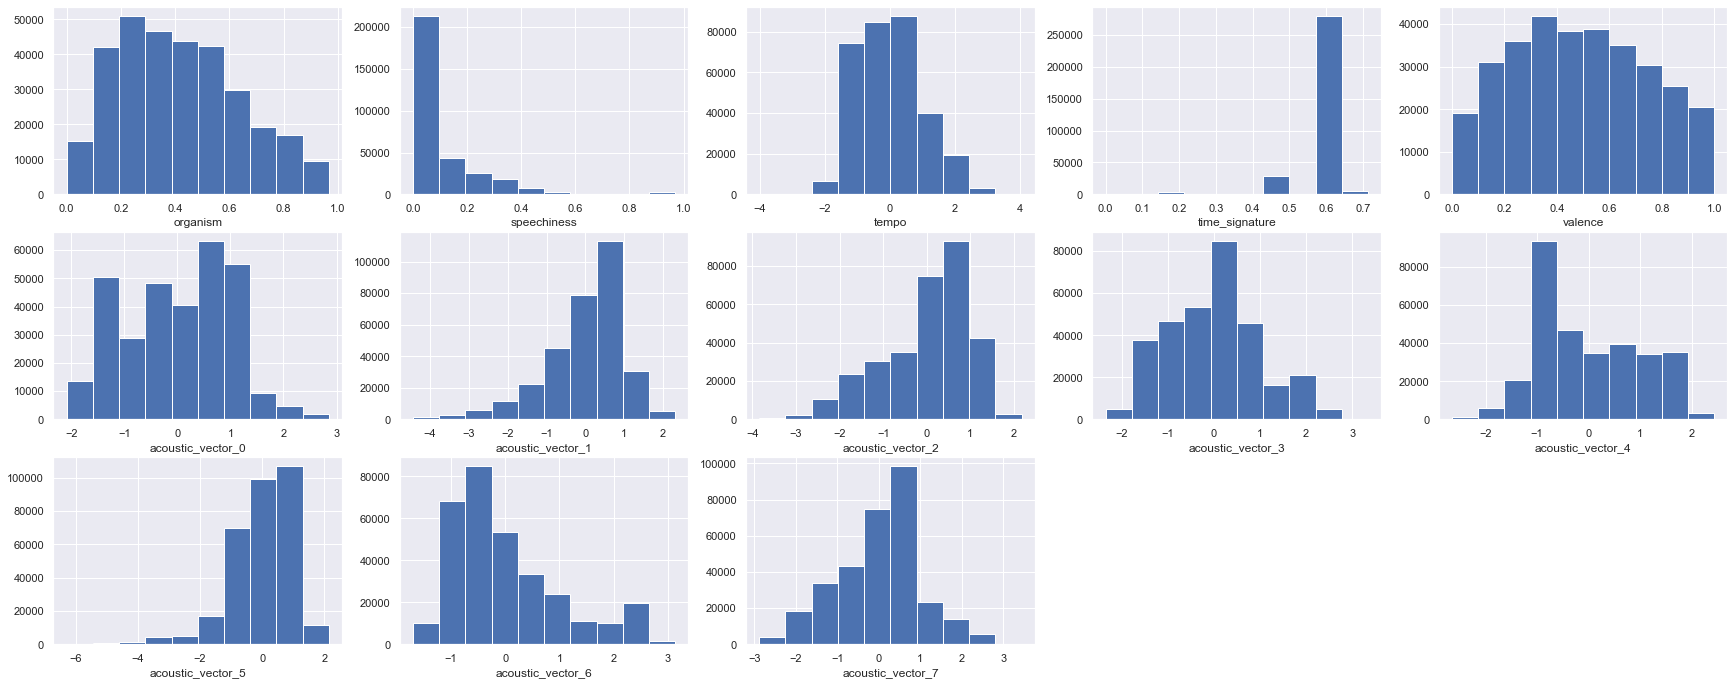

In [15]:
plt.figure(figsize=(30,20))
n = 1

for i in range(16,len(col)):
    plt.subplot(5,5,n)
    track_features[col[i]].hist()
    plt.xlabel(col[i])
    n +=1

## acoustic_vector 0-8

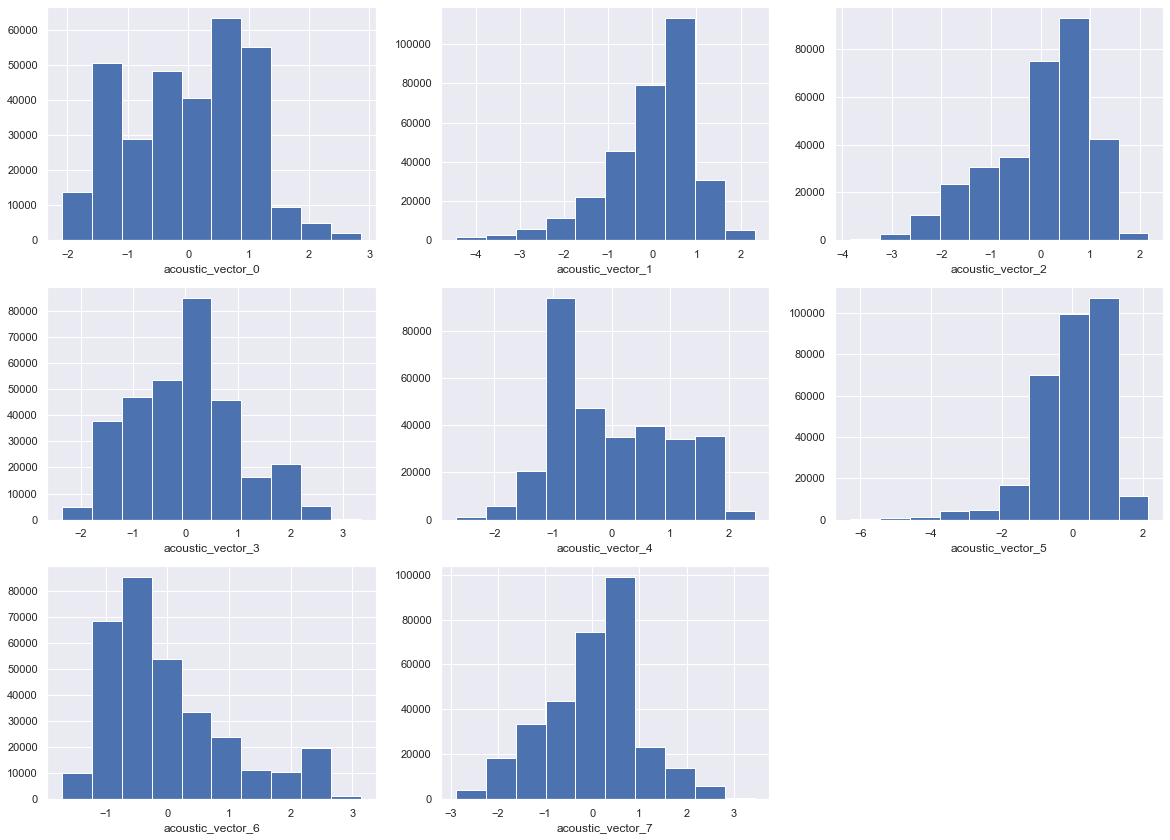

In [16]:
plt.figure(figsize=(20,30))
n = 1

for colname in ['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2',
                'acoustic_vector_3','acoustic_vector_4','acoustic_vector_5',
                'acoustic_vector_6','acoustic_vector_7']:
    plt.subplot(6,3,n)
    track_features[colname].hist()
    plt.xlabel(colname)
    n +=1

## correlation

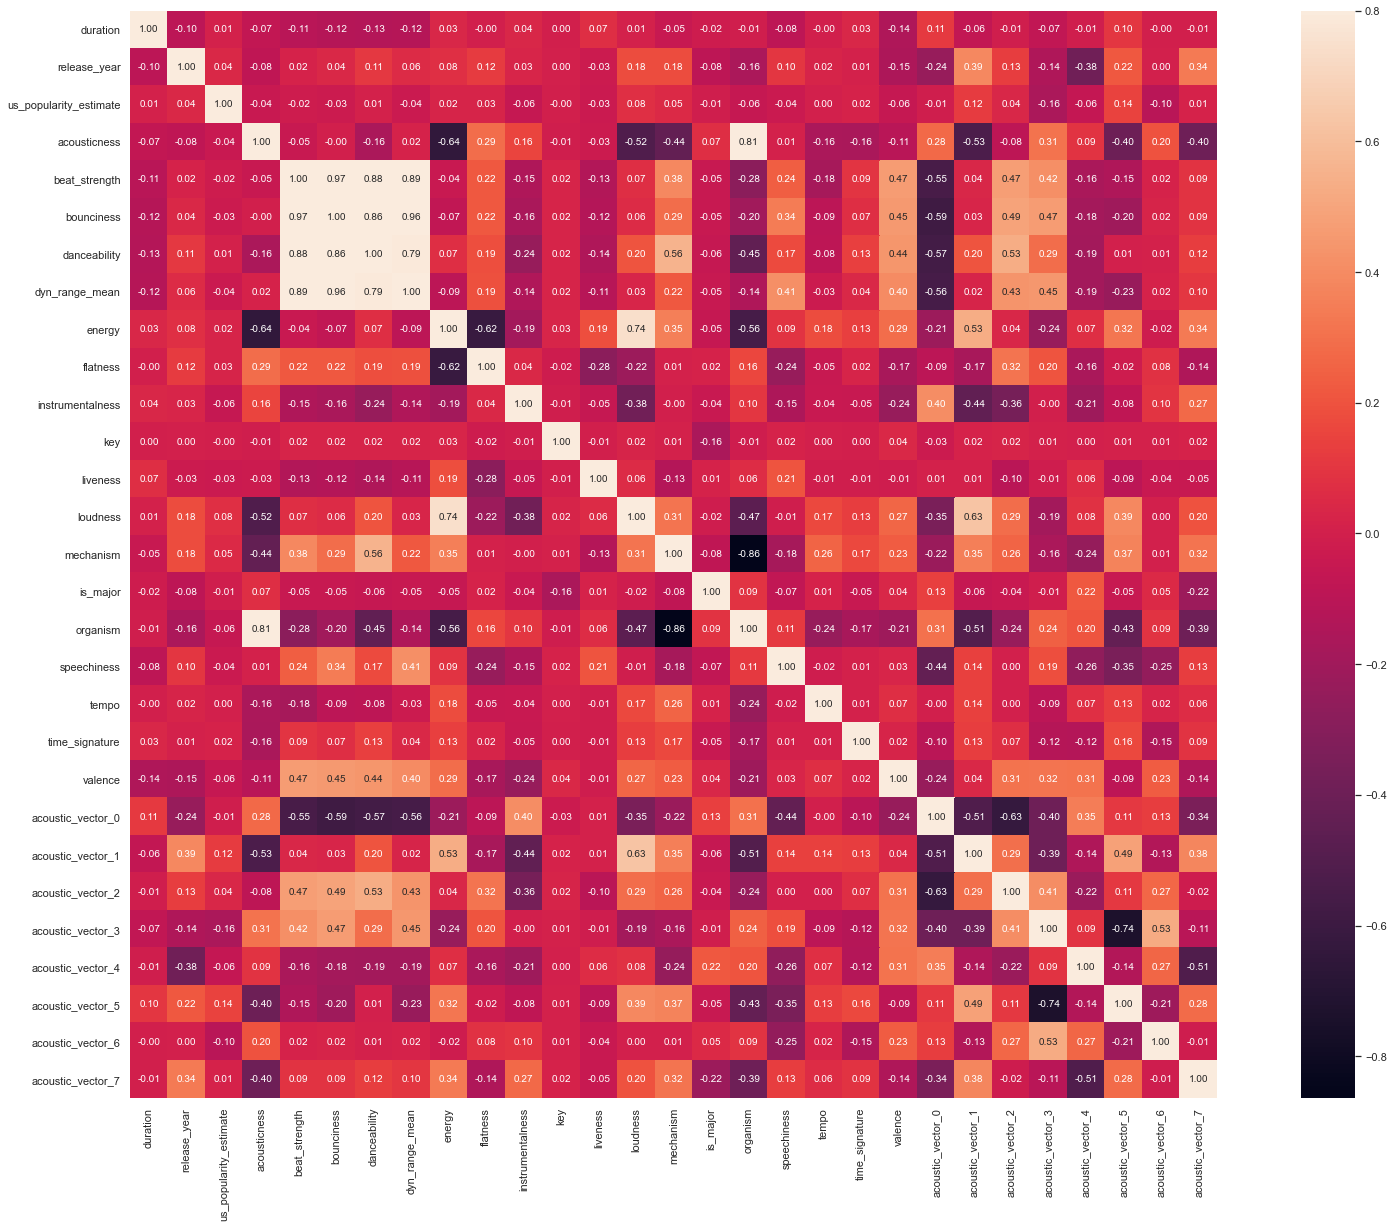

In [17]:
corrmat=track_features.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat,cbar=True, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});

## EDA on training_set 

In [27]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [28]:
training_set.tail()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
2323207,63_ffffbd30-c598-46c4-af6a-569403e4bd44,0.789474,1.0,t_6335a948-7d30-4bbd-91e9-76f2592e3a25,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2323208,63_ffffbd30-c598-46c4-af6a-569403e4bd44,0.842105,1.0,t_3e2928a7-dcc4-49bf-a21a-9d28cf1bdb6c,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2323209,63_ffffbd30-c598-46c4-af6a-569403e4bd44,0.894737,1.0,t_a9aab736-565f-4248-b9b8-9385a90fb6aa,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2323210,63_ffffbd30-c598-46c4-af6a-569403e4bd44,0.947368,1.0,t_0df9627d-4ac7-45ff-adc2-dd736e83e099,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2323211,63_ffffbd30-c598-46c4-af6a-569403e4bd44,1.000000,1.0,t_7b8721c0-68dd-43e4-aee5-497647865ef2,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323212 entries, 0 to 2323211
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   session_id                                  object 
 1   session_position                            float64
 2   session_length                              float64
 3   track_id_clean                              object 
 4   skip_1                                      int64  
 5   skip_2                                      int64  
 6   skip_3                                      int64  
 7   not_skipped                                 int64  
 8   context_switch                              int64  
 9   no_pause_before_play                        int64  
 10  short_pause_before_play                     int64  
 11  long_pause_before_play                      int64  
 12  hist_user_behavior_n_seekfwd                float64
 13  hist_user_behavior_n_seekba

In [6]:
training_set.shape

(2323212, 40)

In [7]:
training_set.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,...,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06,2.323212e+06
mean,4.346776e-01,7.517747e-01,4.200525e-01,5.145161e-01,6.419957e-01,3.406095e-01,4.275890e-02,7.741928e-01,1.404155e-01,1.657163e-01,...,3.355570e-01,6.968800e-04,1.291316e-06,7.748970e-02,3.228289e-05,8.860405e-02,4.763405e-01,3.363447e-03,1.864660e-03,3.523041e-01
std,2.857705e-01,3.460498e-01,4.935671e-01,4.997893e-01,4.794135e-01,4.739143e-01,2.023131e-01,4.181129e-01,3.474177e-01,3.718258e-01,...,4.721849e-01,2.638929e-02,1.136360e-03,2.673669e-01,5.681713e-03,2.841714e-01,4.994400e-01,5.789763e-02,4.314144e-02,4.776882e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.105263e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.210526e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.315789e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## change the datatype

In [19]:
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    training_set[colname] = training_set[colname].astype(int,copy=False)

In [20]:
training_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [21]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium']

In [23]:
training_set.describe(include=['O'])

,session_id,track_id_clean
count,2323212,2323212
unique,139600,297811
top,63_ef649a67-fae1-4821-b68d-1ab1d42f2629,t_1a73002a-d065-4a33-b98a-a3b0443310be
freq,20,8071


## plot all categorical features

In [39]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_switch','hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_end_appload']

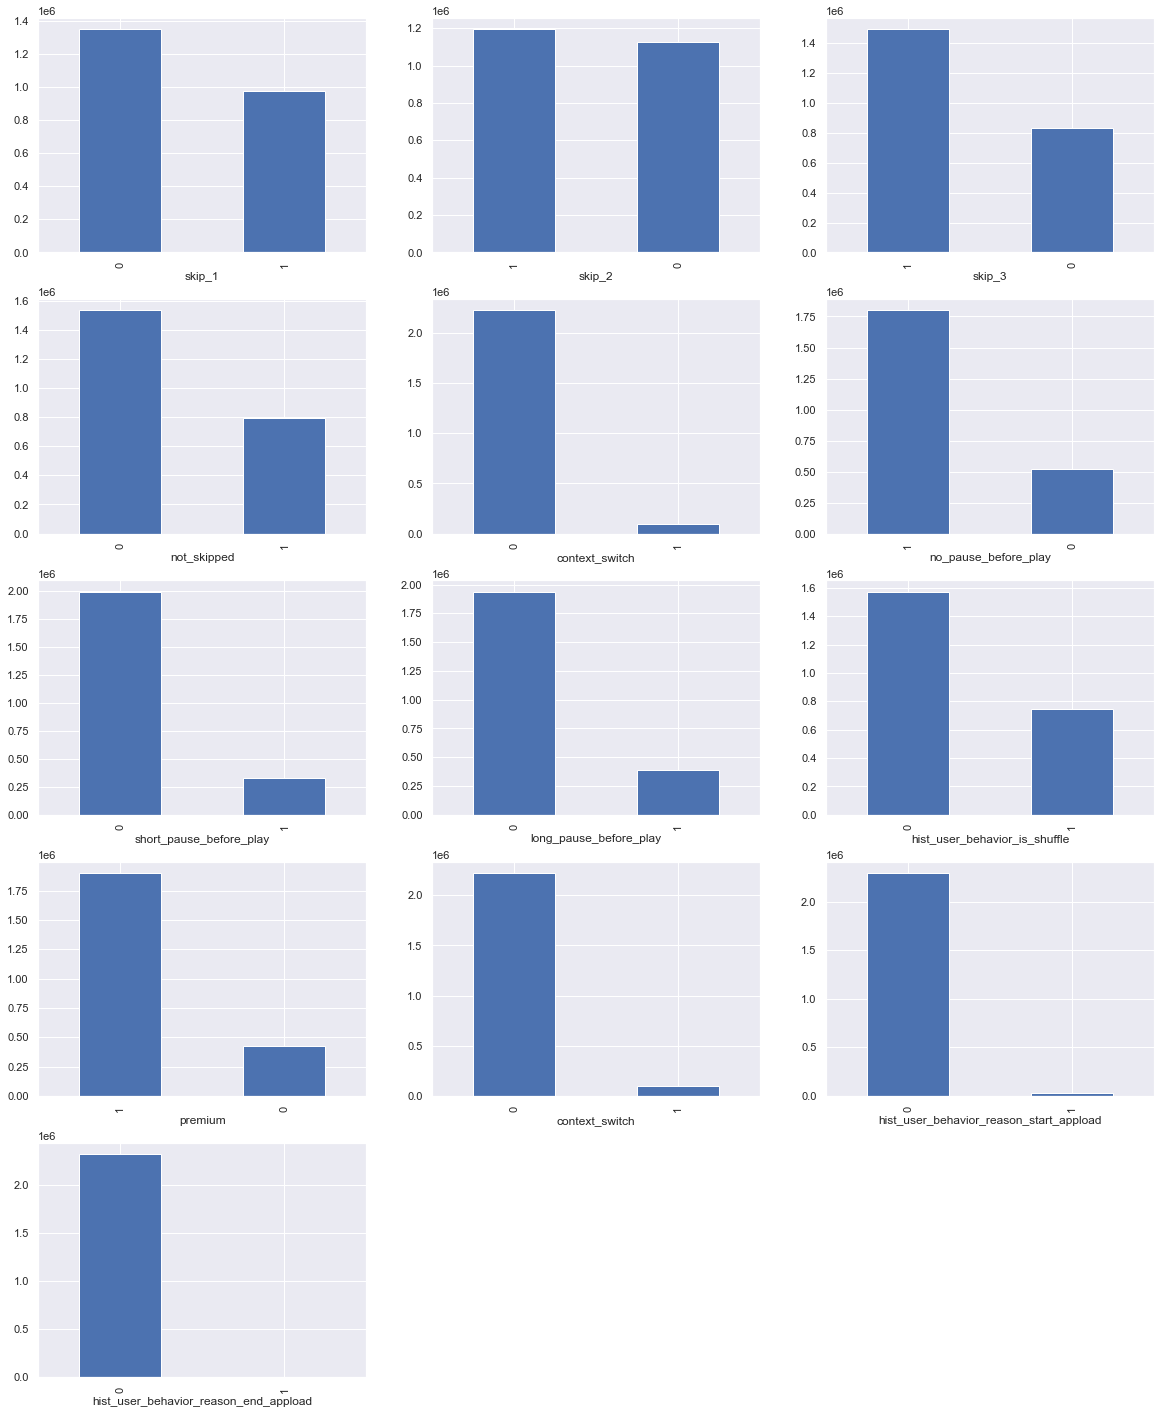

In [40]:
plt.figure(figsize=(20,25))
n = 1

for colname in col:
    plt.subplot(5,3,n)
    training_set[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1

## one-hot encoding

In [41]:
training_set_without_session_track = training_set.drop(['session_id', 'track_id_clean'], axis=1)

In [42]:
training_set_without_session_track.shape

(2323212, 38)

In [44]:
training_set_without_session_track = pd.get_dummies(training_set_without_session_track)

In [45]:
training_set_without_session_track.shape

(2323212, 38)

## correlation
not_skipped_1 means not skip

In [46]:
correlation = training_set_without_session_track.corr()

In [48]:
correlation['not_skipped'].sort_values()

skip_3                                       -0.962452
skip_2                                       -0.739893
hist_user_behavior_reason_end_fwdbtn         -0.681203
skip_1                                       -0.611666
hist_user_behavior_reason_start_fwdbtn       -0.387314
hist_user_behavior_reason_end_endplay        -0.216302
hist_user_behavior_reason_end_backbtn        -0.206549
short_pause_before_play                      -0.129966
long_pause_before_play                       -0.097153
hist_user_behavior_n_seekfwd                 -0.096192
session_length                               -0.067647
hist_user_behavior_reason_start_backbtn      -0.065030
hist_user_behavior_reason_end_logout         -0.040403
hist_user_behavior_is_shuffle                -0.038727
hist_user_behavior_reason_start_appload      -0.037921
context_type_user_collection                 -0.037459
hist_user_behavior_reason_end_remote         -0.030159
context_type_radio                           -0.026361
hour_of_da